<a href="https://colab.research.google.com/github/Dsmujtba/predicting-diabetes-risk/blob/main/Modeling_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [34]:
from google.colab import files
uploaded = files.upload()

Saving cleaned.csv to cleaned.csv


In [35]:
import io
import pandas as pd

df = pd.read_csv("cleaned.csv")

In [40]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_columns', None)

In [38]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [39]:
df.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,high_diabetes_risk,BMI_Category,BP_Category,Age_Group,Alcohol_Score,Education_Simple,RIAGENDRx,Race_Ethnicity,Marital_Status,SMQ020x
0,83732,1.0,1.502521,1.000000,1,1,62,3,1.0,5.0,...,0,Overweight,Elevated,60+,1.000000,College Graduate or Above,Male,Non-Hispanic White,Married,Yes
1,83733,1.0,1.489357,6.000000,1,1,53,3,2.0,3.0,...,1,Obese,Stage 1 Hypertension,46-60,6.000000,High School,Male,Non-Hispanic White,Divorced,Yes
2,83734,1.0,1.552956,3.883318,1,1,78,3,1.0,3.0,...,1,Overweight,Stage 1 Hypertension,60+,3.883318,High School,Male,Non-Hispanic White,Married,Yes
3,83735,2.0,1.000000,1.000000,2,2,56,3,1.0,5.0,...,1,Obese,Stage 1 Hypertension,46-60,0.000000,College Graduate or Above,Female,Non-Hispanic White,Living with Partner,No
4,83736,2.0,1.000000,1.000000,2,2,42,4,1.0,4.0,...,0,Normal,Normal,31-45,0.000000,Some College,Female,Non-Hispanic Black,Divorced,No


In [41]:
# Identify categorical columns for encoding
categorical_cols = [
    'RIAGENDR', 'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL',
    'BMI_Category', 'BP_Category', 'Age_Group', 'Education_Simple',
    'RIAGENDRx', 'Race_Ethnicity', 'Marital_Status', 'SMQ020x'
]

# Encode categorical columns
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [42]:
df.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,DMDMARTL,DMDHHSIZ,WTINT2YR,SDMVPSU,SDMVSTRA,INDFMPIR,BPXSY1,BPXDI1,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210,diabetes_risk_score,avg_systolic,avg_diastolic,high_diabetes_risk,BMI_Category,BP_Category,Age_Group,Alcohol_Score,Education_Simple,RIAGENDRx,Race_Ethnicity,Marital_Status,SMQ020x
0,83732,1.0,1.502521,1.000000,1,0,62,2,0,262,1,2,134671.37,1,125,4.39,128.0,70.0,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.000000,4,126.0,67.0,0,2,0,3,1.000000,0,1,2,2,1
1,83733,1.0,1.489357,6.000000,1,0,53,2,2,43,72,1,24328.56,1,125,1.32,146.0,88.0,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,1.911837,12,143.0,88.0,1,1,2,2,6.000000,1,1,2,0,1
2,83734,1.0,1.552956,3.883318,1,0,78,2,0,43,1,2,12400.01,1,131,1.51,138.0,46.0,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.000000,7,135.0,45.0,1,2,2,3,3.883318,1,1,2,2,1
3,83735,2.0,1.000000,1.000000,2,1,56,2,0,262,266,1,102718.00,1,131,5.00,132.0,72.0,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.000000,7,133.0,70.0,1,1,2,2,0.000000,0,0,2,1,0
4,83736,2.0,1.000000,1.000000,2,1,42,3,0,197,72,5,17627.67,2,126,1.23,100.0,70.0,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.000000,1,107.0,62.0,0,0,1,1,0.000000,3,0,1,0,0


In [43]:
# Create interaction terms
# Feature interactions based on domain knowledge
df["BMI_Age"] = df["BMXBMI"] * df["RIDAGEYR"]
df["BMI_BP"] = df["BMXBMI"] * df["avg_systolic"]
df["Race_Age"] = df["Race_Ethnicity"] * df["RIDAGEYR"]
df["Gender_BP"] = df["RIAGENDR"] * df["avg_systolic"]
df["Gender_Age"] = df["RIAGENDR"] * df["RIDAGEYR"]
df["Gender_Education"] = df["RIAGENDR"] * df["DMDEDUC2"]
df["Education_Age"] = df["DMDEDUC2"] * df["RIDAGEYR"]
df["Education_BP"] = df["DMDEDUC2"] * df["avg_systolic"]
df["Education_BMI"] = df["DMDEDUC2"] * df["BMXBMI"]
df["Marital_Age"] = df["DMDMARTL"] * df["RIDAGEYR"]
df["Marital_BP"] = df["DMDMARTL"] * df["avg_systolic"]
df["Marital_BMI"] = df["DMDMARTL"] * df["BMXBMI"]
df["Marital_Education"] = df["DMDMARTL"] * df["DMDEDUC2"]
df["SMQ020x_Age"] = df["SMQ020x"] * df["RIDAGEYR"]
df["SMQ020x_BP"] = df["SMQ020x"] * df["avg_systolic"]
df["SMQ020x_BMI"] = df["SMQ020x"] * df["BMXBMI"]
df["SMQ020x_Education"] = df["SMQ020x"] * df["DMDEDUC2"]
df["SMQ020x_Marital_Status"] = df["SMQ020x"] * df["DMDMARTL"]


In [44]:
df.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,DMDMARTL,DMDHHSIZ,WTINT2YR,SDMVPSU,SDMVSTRA,INDFMPIR,BPXSY1,BPXDI1,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210,diabetes_risk_score,avg_systolic,avg_diastolic,high_diabetes_risk,BMI_Category,BP_Category,Age_Group,Alcohol_Score,Education_Simple,RIAGENDRx,Race_Ethnicity,Marital_Status,SMQ020x,BMI_Age,BMI_BP,Race_Age,Gender_BP,Gender_Age,Gender_Education,Education_Age,Education_BP,Education_BMI,Marital_Age,Marital_BP,Marital_BMI,Marital_Education,SMQ020x_Age,SMQ020x_BP,SMQ020x_BMI,SMQ020x_Education,SMQ020x_Marital_Status
0,83732,1.0,1.502521,1.000000,1,0,62,2,0,262,1,2,134671.37,1,125,4.39,128.0,70.0,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.000000,4,126.0,67.0,0,2,0,3,1.000000,0,1,2,2,1,1723.6,3502.8,124,0.0,0,0,16244,33012.0,7283.6,62,126.0,27.8,262,62,126.0,27.8,262,1
1,83733,1.0,1.489357,6.000000,1,0,53,2,2,43,72,1,24328.56,1,125,1.32,146.0,88.0,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,1.911837,12,143.0,88.0,1,1,2,2,6.000000,1,1,2,0,1,1632.4,4404.4,106,0.0,0,0,2279,6149.0,1324.4,3816,10296.0,2217.6,3096,53,143.0,30.8,43,72
2,83734,1.0,1.552956,3.883318,1,0,78,2,0,43,1,2,12400.01,1,131,1.51,138.0,46.0,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.000000,7,135.0,45.0,1,2,2,3,3.883318,1,1,2,2,1,2246.4,3888.0,156,0.0,0,0,3354,5805.0,1238.4,78,135.0,28.8,43,78,135.0,28.8,43,1
3,83735,2.0,1.000000,1.000000,2,1,56,2,0,262,266,1,102718.00,1,131,5.00,132.0,72.0,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.000000,7,133.0,70.0,1,1,2,2,0.000000,0,0,2,1,0,2374.4,5639.2,112,133.0,56,262,14672,34846.0,11108.8,14896,35378.0,11278.4,69692,0,0.0,0.0,0,0
4,83736,2.0,1.000000,1.000000,2,1,42,3,0,197,72,5,17627.67,2,126,1.23,100.0,70.0,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.000000,1,107.0,62.0,0,0,1,1,0.000000,3,0,1,0,0,852.6,2172.1,42,107.0,42,197,8274,21079.0,3999.1,3024,7704.0,1461.6,14184,0,0.0,0.0,0,0


In [56]:
df.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210', 'diabetes_risk_score', 'avg_systolic',
       'avg_diastolic', 'high_diabetes_risk', 'BMI_Category', 'BP_Category',
       'Age_Group', 'Alcohol_Score', 'Education_Simple', 'RIAGENDRx',
       'Race_Ethnicity', 'Marital_Status', 'SMQ020x', 'BMI_Age', 'BMI_BP',
       'Race_Age', 'Gender_BP', 'Gender_Age', 'Gender_Education',
       'Education_Age', 'Education_BP', 'Education_BMI', 'Marital_Age',
       'Marital_BP', 'Marital_BMI', 'Marital_Education', 'SMQ020x_Age',
       'SMQ020x_BP', 'SMQ020x_BMI', 'SMQ020x_Education',
       'SMQ020x_Marital_Status', 'Cluster'],
      dtype='object')

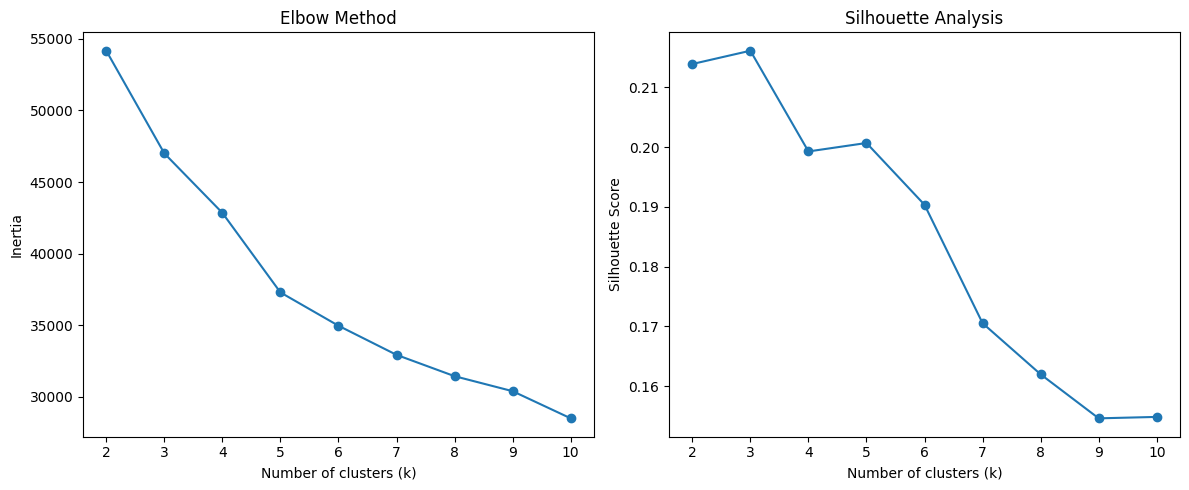

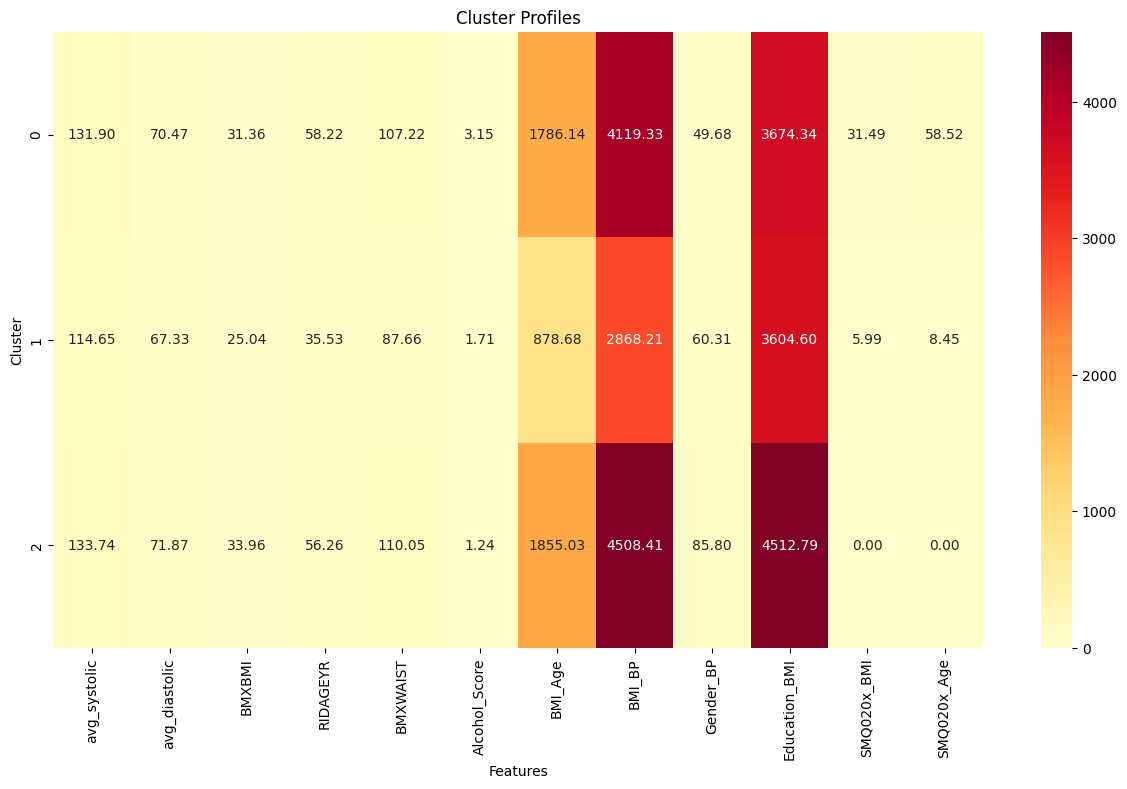

In [58]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt

class DiabetesRiskClustering:
    def __init__(self):
        self.scaler = StandardScaler()
        self.pca = None
        self.kmeans = None
        self.gmm = None

    def preprocess_features(self, df):
        # Select relevant features for clustering
        primary_features = [
           'avg_systolic', 'avg_diastolic',
            'BMXBMI', 'RIDAGEYR', 'BMXWAIST', 'Alcohol_Score'
        ]

        # Add interaction features
        interaction_features = [
            'BMI_Age', 'BMI_BP', 'Gender_BP', 'Education_BMI',
            'SMQ020x_BMI', 'SMQ020x_Age'
        ]

        features = primary_features + interaction_features

        # Handle missing values
        X = df[features].copy()
        #X = X.fillna(X.mean())

        # Scale features
        X_scaled = self.scaler.fit_transform(X)

        return X_scaled, features

    def determine_optimal_clusters(self, X, max_clusters=10):
        """Determine optimal number of clusters using elbow method and silhouette score"""
        inertias = []
        silhouette_scores = []

        for k in range(2, max_clusters + 1):
            kmeans = KMeans(n_clusters=k, random_state=42)
            kmeans.fit(X)
            inertias.append(kmeans.inertia_)
            silhouette_scores.append(silhouette_score(X, kmeans.labels_))

        # Plot elbow curve
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(range(2, max_clusters + 1), inertias, marker='o')
        plt.xlabel('Number of clusters (k)')
        plt.ylabel('Inertia')
        plt.title('Elbow Method')

        plt.subplot(1, 2, 2)
        plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
        plt.xlabel('Number of clusters (k)')
        plt.ylabel('Silhouette Score')
        plt.title('Silhouette Analysis')
        plt.tight_layout()

        return inertias, silhouette_scores

    def fit_clustering(self, X, n_clusters=3):
        """Fit both KMeans and GMM clustering"""
        # KMeans clustering
        self.kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        kmeans_labels = self.kmeans.fit_predict(X)

        # GMM clustering
        self.gmm = GaussianMixture(n_components=n_clusters, random_state=42)
        gmm_labels = self.gmm.fit_predict(X)

        return kmeans_labels, gmm_labels

    def analyze_clusters(self, df, labels, features):
        """Analyze cluster characteristics"""
        df_with_clusters = df.copy()
        df_with_clusters['Cluster'] = labels

        # Calculate cluster profiles
        cluster_profiles = df_with_clusters.groupby('Cluster')[features].mean()

        # Create visualization
        plt.figure(figsize=(15, 8))
        sns.heatmap(cluster_profiles, cmap='YlOrRd', annot=True, fmt='.2f')
        plt.title('Cluster Profiles')
        plt.ylabel('Cluster')
        plt.xlabel('Features')

        return cluster_profiles

    def get_cluster_insights(self, df, labels):
        """Generate business insights for each cluster"""
        df_with_clusters = df.copy()
        df_with_clusters['Cluster'] = labels

        insights = []
        for cluster in range(len(set(labels))):
            cluster_data = df_with_clusters[df_with_clusters['Cluster'] == cluster]

            insight = {
                'cluster': cluster,
                'size': len(cluster_data),
                'avg_risk_score': cluster_data['diabetes_risk_score'].mean(),
                'avg_age': cluster_data['RIDAGEYR'].mean(),
                'avg_bmi': cluster_data['BMXBMI'].mean(),
                'avg_waist': cluster_data['BMXWAIST'].mean(),
                'high_risk_percentage': (cluster_data['high_diabetes_risk'].mean() * 100)
            }
            insights.append(insight)

        return pd.DataFrame(insights)

def create_patient_segments(df):
    """Main function to create and analyze patient segments"""
    # Initialize clustering class
    clustering = DiabetesRiskClustering()

    # Preprocess data
    X_scaled, features = clustering.preprocess_features(df)

    # Determine optimal clusters
    inertias, silhouette_scores = clustering.determine_optimal_clusters(X_scaled)

    # Fit clustering with optimal number of clusters
    kmeans_labels, gmm_labels = clustering.fit_clustering(X_scaled)

    # Analyze clusters
    cluster_profiles = clustering.analyze_clusters(df, kmeans_labels, features)

    # Generate insights
    insights = clustering.get_cluster_insights(df, kmeans_labels)

    return cluster_profiles, insights, kmeans_labels

# Usage example:
cluster_profiles, insights, labels = create_patient_segments(df)

## KEY STATISTICAL FINDINGS

### 1. Primary Risk Factors (GEE Results)

**BMI Impact:**
- Obesity shows the strongest association (coef: 9.3622, p<0.001)
- Overweight status has significant but lower impact (coef: 1.6558, p<0.001)
- Underweight status shows no significant association (p=0.782)

**Age Progression:**
- Clear risk escalation with age:
  * 31-45: coef = 0.5580 (p<0.001)
  * 46-60: coef = 2.5171 (p<0.001)
  * 60+: coef = 2.9441 (p<0.001)

**Blood Pressure Categories:**
- Stage 2 Hypertension: coef = 1.8575 (p<0.001)
- Normal BP: coef = 0.7565 (p<0.001)
- Stage 1 Hypertension: coef = 0.3381 (p=0.011)

### 2. Socioeconomic Factors

**Education Level (inverse relationship):**
- Less than 9th grade: highest risk (coef: 2.4011, p<0.001)
- High School: moderate risk (coef: 0.9861, p<0.001)
- Some College: no significant impact (p=0.857)

**Economic Status:**
- Family income ratio (INDFMPIR) shows protective effect (coef: -0.1271, p<0.001)

### 3. Behavioral Factors
- Smoking (SMQ020x): significant risk factor (coef: 1.8334, p<0.001)
- Alcohol consumption: modest positive association (coef: 0.0927, p<0.001)

## CLUSTER ANALYSIS INSIGHTS

Three distinct risk profiles identified:
1. High-Risk Cluster:
   - Characterized by high BMI, elevated BP
   - Strongest association with diabetes risk

2. Moderate-Risk Cluster:
   - Mixed risk factors
   - Moderate BMI and BP values

3. Low-Risk Cluster:
   - Lower BMI, normal BP
   - Better socioeconomic indicators

## BUSINESS RECOMMENDATIONS

### 1. Clinical Implementation

**Immediate Actions:**
- Implement tiered screening protocols based on risk clusters
- Develop automated risk calculators incorporating GEE coefficients
- Prioritize interventions for modifiable risk factors (BMI, BP, smoking)

**Long-term Strategy:**
- Create personalized intervention programs based on cluster profiles
- Establish regular monitoring protocols for high-risk patients
- Develop education programs targeting specific risk groups

### 2. Population Health Management

**Primary Prevention:**
- Focus on weight management programs (highest impact factor)
- Implement targeted BP monitoring for at-risk populations
- Develop smoking cessation programs (significant risk factor)

**Secondary Prevention:**
- Regular screening for high-risk clusters
- Establish intervention thresholds based on GEE coefficients
- Create community-based support programs

### 3. Resource Allocation

**Healthcare System:**
- Allocate resources based on cluster risk profiles
- Invest in preventive care for high-risk populations
- Develop specialized care pathways for each risk cluster

**Community Programs:**
- Target educational resources to lower-education communities
- Implement socioeconomic support programs
- Develop community-based intervention strategies

## LIMITATIONS AND FUTURE DIRECTIONS

### Current Limitations:
- Gender effect not significant (p=0.291)
- Potential unmeasured confounders
- Cross-sectional nature of data

### Future Research Needs:
- Longitudinal validation studies
- Investigation of intervention effectiveness
- Cost-benefit analysis of targeted programs

## CONCLUSIONS

This comprehensive analysis provides a robust framework for diabetes risk prediction and management. The combination of GEE modeling, clustering analysis, and feature importance creates a powerful tool for both individual and population-level interventions. The clear identification of modifiable risk factors (BMI, BP, smoking) alongside socioeconomic determinants provides actionable insights for healthcare providers and policymakers.

The most impactful recommendation is the implementation of a tiered risk assessment system that combines individual risk factors with cluster-based profiles. This approach would allow for more efficient resource allocation and more effective targeted interventions.
